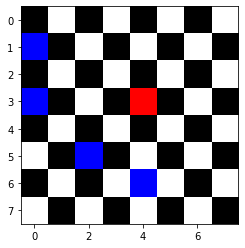

In [91]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from random import random


class ChessBoard:
    white = [1,1,1]
    blue = [0, 0, 1]
    red = [1, 0, 0]
    under_attak = False
    
    def __init__(self):
        self.grid = np.zeros((8,8,3))
        for x in np.ndindex(8,8):
            if x[0]%2 != x[1]%2:
                self.grid[x[0],x[1]] = ChessBoard.white

    def add_red(self, row, col):
        self.grid[row,col] = ChessBoard.red

    def add_blue(self, row, col):
        self.grid[row,col] = ChessBoard.blue
        
    def render(self):
        plt.imshow(self.grid)
        
    def daigonal(self, red ,blue):
        if abs(red[0]-blue[0]) == abs(red[1] - blue[1]):
            return True
       
    def is_under_attack(self):
        for x in np.ndindex(8,8):
            
            if int(self.grid[x[0],x[1]][0]) == ChessBoard.red[0] and int(self.grid[x[0],x[1]][1]) == ChessBoard.red[1] and int(self.grid[x[0],x[1]][2]) == ChessBoard.red[2]:
                red = x
                
                
            if int(self.grid[x[0],x[1]][0]) == ChessBoard.blue[0] and int(self.grid[x[0],x[1]][1]) == ChessBoard.blue[1] and int(self.grid[x[0],x[1]][2]) == ChessBoard.blue[2]:
                blue = x
                
        diago = self.daigonal(red,blue) 
        
        if diago :
             return True  
            
        elif red[0] == blue[0]:
             return True
        
        elif red[1] == blue[1]:
             return True
        
        else:
             return False
    

board=ChessBoard()
def test_horizantal():
    board.add_red(3,4)
    board.add_blue(3,0)
    assert board.is_under_attack() == True
    
def test_column():   
    board.add_red(3,4)
    board.add_blue(6,4)
    assert board.is_under_attack() == True
    
def test_diagonal1():
    board.add_red(3,4)
    board.add_blue(5,2)
    assert board.is_under_attack() == True
    
def test_not_attaked():
    board.add_red(3,4)
    board.add_blue(1,0)
    assert board.is_under_attack() == False

test_not_attaked()
test_horizantal()
test_column()
test_diagonal1()


board.render()
